<a href="https://colab.research.google.com/github/Gakwaya011/athlete-recovery-AI/blob/main/ML/notebooks/energy_expenditure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [ ]:
# Load dataset
df = pd.read_csv('../data/calories.csv')

df.drop(columns=['User_ID'], inplace=True)

print("Dataset Loaded. Shape:", df.shape)
df.head()

Dataset Loaded. Shape: (15000, 8)


,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [ ]:
# Dropping wearable-dependent features
features_to_drop = ['Heart_Rate', 'Body_Temp']
df.drop(columns=features_to_drop, inplace=True)

# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Basic stats to check for outliers (e.g., negative age or impossible height)
df.describe()

Missing values per column:
Gender      0
Age         0
Height      0
Weight      0
Duration    0
Calories    0
dtype: int64


,Age,Height,Weight,Duration,Calories
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,42.789800,174.465133,74.966867,15.530600,89.539533
std,16.980264,14.258114,15.035657,8.319203,62.456978
min,20.000000,123.000000,36.000000,1.000000,1.000000
25%,28.000000,164.000000,63.000000,8.000000,35.000000
50%,39.000000,175.000000,74.000000,16.000000,79.000000
75%,56.000000,185.000000,87.000000,23.000000,138.000000
max,79.000000,222.000000,132.000000,30.000000,314.000000


In [ ]:
# Convert Gender to numeric: female=0, male=1 (or vice versa)
df['Gender'] = df['Gender'].map({'male': 1, 'female': 0})

print("Data types after encoding:")
print(df.dtypes)
df.head()

Data types after encoding:
Gender        int64
Age           int64
Height      float64
Weight      float64
Duration    float64
Calories    float64
dtype: object


,Gender,Age,Height,Weight,Duration,Calories
0,1,68,190.0,94.0,29.0,231.0
1,0,20,166.0,60.0,14.0,66.0
2,1,69,179.0,79.0,5.0,26.0
3,0,34,179.0,71.0,13.0,71.0
4,0,27,154.0,58.0,10.0,35.0


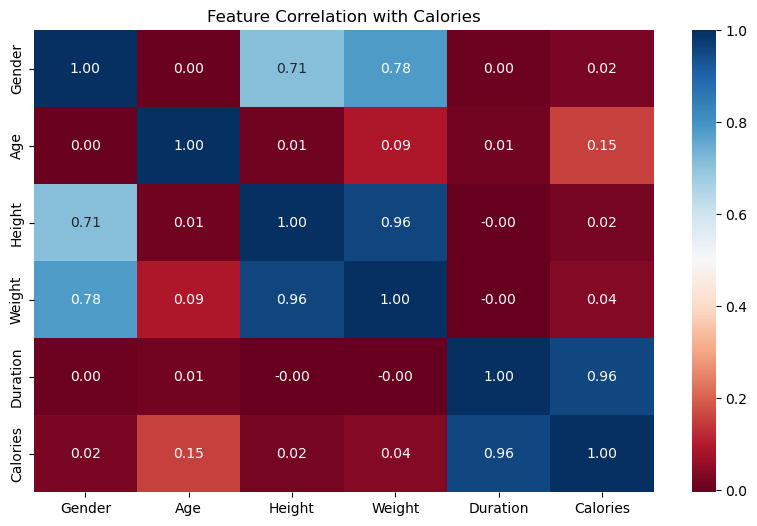

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='RdBu', fmt='.2f')
plt.title("Feature Correlation with Calories")
plt.show()

In [ ]:
# Define features (X) and target (y)
X = df.drop(columns=['Calories'])
y = df['Calories']

# Split into Training (80%) and Testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 12000 samples
Testing set size: 3000 samples


In [ ]:
# Initialize the model
model = XGBRegressor(n_estimators=1000, learning_rate=0.05, max_depth=5)

# Train the model
model.fit(X_train, y_train)

print("Model Training Complete.")

Model Training Complete.


In [ ]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f} calories")
print(f"Model R² Score: {r2*100:.2f}%")

Mean Absolute Error: 8.54 calories
Model R² Score: 96.33%


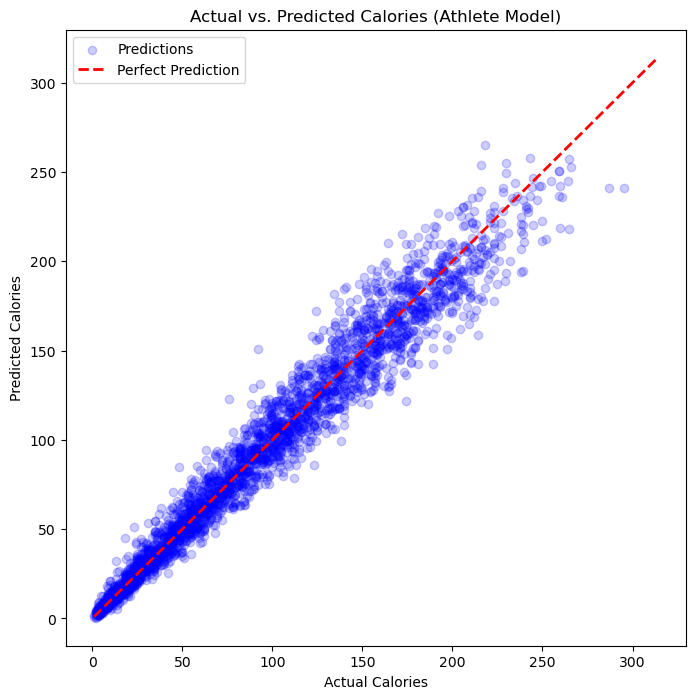

In [ ]:
# 6. VISUAL PROOF
plt.figure(figsize=(8, 8))

# Use y_test and y_pred (the variables created in previous steps)
plt.scatter(y_test, y_pred, alpha=0.2, color='blue', label='Predictions')

# Draw the 'Ideal' line where Actual == Predicted
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Perfect Prediction')

plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories")
plt.title("Actual vs. Predicted Calories (Athlete Model)")
plt.legend()
plt.show()

In [ ]:
import pickle
import os

# Create a folder for the model if it doesn't exist
model_path = '../models'
if not os.path.exists(model_path):
    os.makedirs(model_path)

# Save the model using pickle
with open(f'{model_path}/calorie_model.pkl', 'wb') as f:
    pickle.dump(model_path, f)

print(f"Model saved successfully at: {model_path}/calorie_model.pkl")

Model saved successfully at: ../models/calorie_model.pkl


In [ ]:
import pickle

# 1. Verify what 'model' is before saving
print(f"Current type of 'model' variable: {type(model)}")
# It MUST say: <class 'xgboost.sklearn.XGBRegressor'>

# 2. Save the actual object
with open('../models/calorie_model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("Model saved successful.")

Current type of 'model' variable: <class 'xgboost.sklearn.XGBRegressor'>
Model saved! Now try the check again.


In [ ]:
import pickle

# Try to load the file you just saved
try:
    with open('../models/calorie_model.pkl', 'rb') as f:
        temp_model = pickle.load(f)

    print(f"Success! Object type: {type(temp_model)}")
    # It should say: <class 'xgboost.sklearn.XGBRegressor'>
except Exception as e:
    print(f"Error: This is not a valid model file. Details: {e}")

Success! Object type: <class 'xgboost.sklearn.XGBRegressor'>
